In [68]:
#kütüphaneleri import edelim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import   train_test_split
from pandas.plotting import parallel_coordinates 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
data =pd.read_csv('Iris.csv') #path ver

In [3]:
data.head() #datayı göz gezdir

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe() #dataya  bak

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#çiçekleri cinslerinden kaçar tane var buna bakalım
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
train,test =train_test_split(data,test_size=0.4,stratify=data['Species'],random_state=42)

In [7]:
who #hangi değişkenlerim var train test gelmiş 

No variables match your requested type.


In [8]:
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,131,7.4,2.8,6.1,1.9,Iris-virginica
6,7,4.6,3.4,1.4,0.3,Iris-setosa
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
26,27,5.0,3.4,1.6,0.4,Iris-setosa
...,...,...,...,...,...,...
37,38,4.9,3.1,1.5,0.1,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


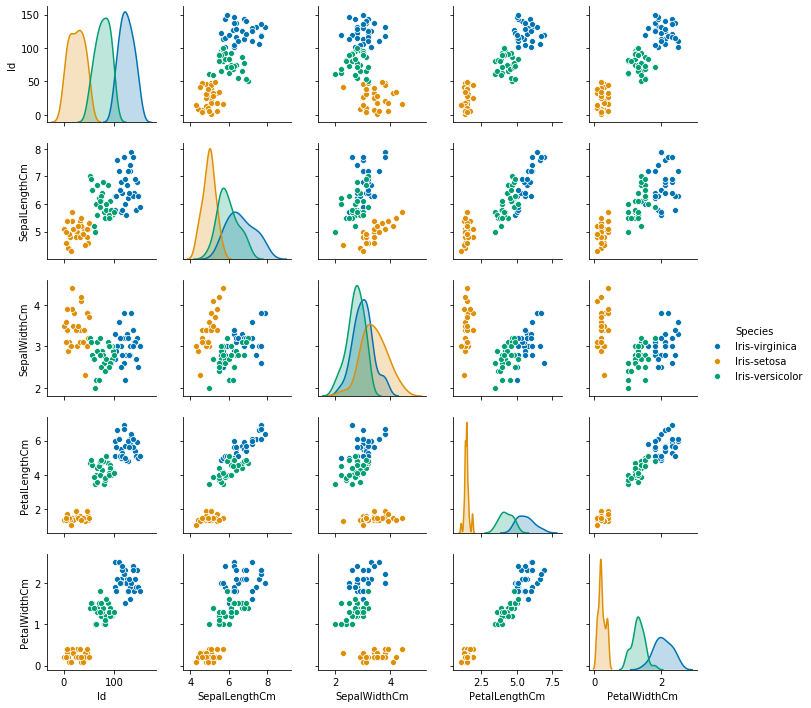

In [9]:
#çizdirelim
sns.pairplot(train,hue='Species',height=2,palette='colorblind')

In [19]:
#TEST_ve_TRAİn olarak tanımlamalarımızıı yapıyoruz
X_train=train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y_train=train.Species
X_test=test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y_test=test.Species                  

In [22]:
mod_dt=DecisionTreeClassifier(max_depth=3,random_state=1)
mod_dt.fit(X_train,y_train)
prediction =mod_dt.predict(X_test)
acc =accuracy_score(prediction,y_test)
print("Doğruluk oranımız:",acc)

Doğruluk oranımız: 0.9833333333333333


In [25]:
fn=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
cn=['setosa','verticolor','virginica']

In [27]:
for feature,importance in zip(fn,mod_dt.feature_importances_):
    print("En önemlileri {}: {}".format(feature,importance))

En önemlileri SepalLengthCm: 0.0
En önemlileri SepalWidthCm: 0.0
En önemlileri PetalLengthCm: 0.42430866337273976
En önemlileri PetalWidthCm: 0.5756913366272602


In [28]:
#Yani sepal lenght ve sepal widht önemli değil diyor petal lenght,petalwidth önemli predict için diyor
